In [19]:
# ruff: noqa
import sys, os
sys.path.append(os.path.abspath("./../feedback-grape"))
sys.path.append(os.path.abspath("./../"))

# ruff: noqa
from helpers import (
    test_implementations,
    generate_decay_superoperator,
)
import numpy as np
from feedback_grape.utils.fidelity import fidelity
from feedback_grape.utils.states import basis
from library.utils.plot_matrix import plot_matrix
from tqdm import tqdm
import jax
import jax.numpy as jnp

test_implementations()

In [20]:
# Physical parameters
N_chains = 3 # Number of parallel chains to simulate
gamma = 0.25 # Decay constant
evaluation_time_steps = 30 # Number of time steps for evaluation

rho_initial = basis(2**N_chains, 2**N_chains - 1)@basis(2**N_chains, 2**N_chains - 1).conj().T # Initial state |111><111|

<Figure size 640x480 with 0 Axes>

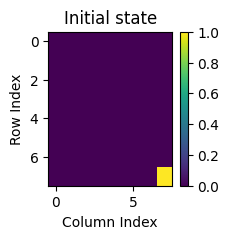

  0%|          | 0/30 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

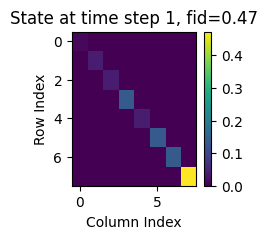

<Figure size 640x480 with 0 Axes>

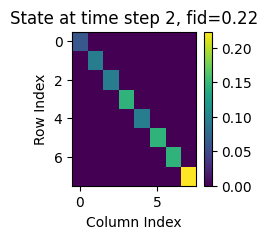

  7%|▋         | 2/30 [00:00<00:01, 17.43it/s]

<Figure size 640x480 with 0 Axes>

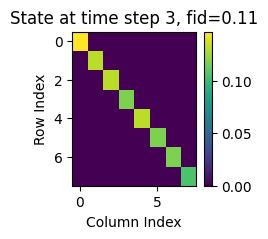

<Figure size 640x480 with 0 Axes>

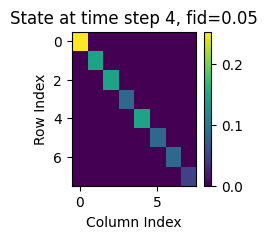

<Figure size 640x480 with 0 Axes>

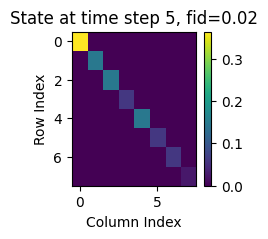

 17%|█▋        | 5/30 [00:00<00:01, 21.95it/s]

<Figure size 640x480 with 0 Axes>

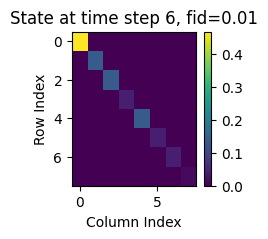

<Figure size 640x480 with 0 Axes>

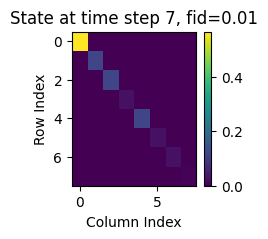

<Figure size 640x480 with 0 Axes>

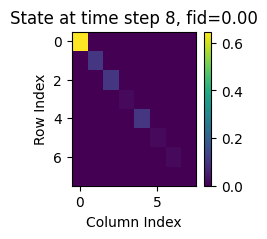

 27%|██▋       | 8/30 [00:00<00:00, 23.04it/s]

<Figure size 640x480 with 0 Axes>

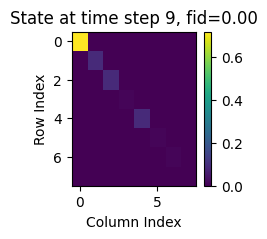

<Figure size 640x480 with 0 Axes>

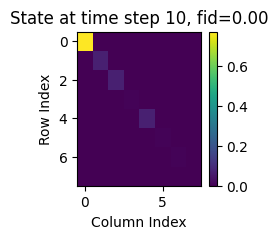

<Figure size 640x480 with 0 Axes>

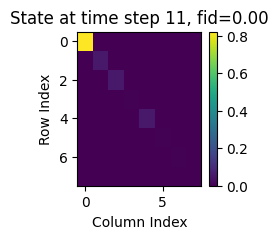

 37%|███▋      | 11/30 [00:00<00:00, 23.44it/s]

<Figure size 640x480 with 0 Axes>

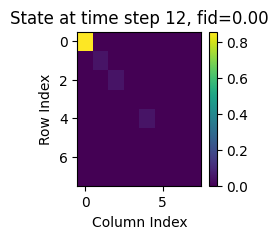

<Figure size 640x480 with 0 Axes>

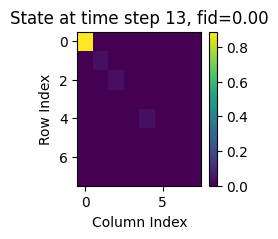

<Figure size 640x480 with 0 Axes>

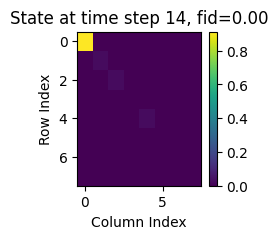

 47%|████▋     | 14/30 [00:00<00:00, 23.59it/s]

<Figure size 640x480 with 0 Axes>

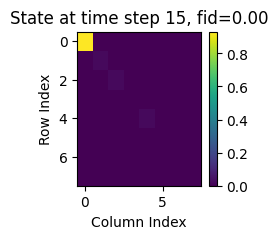

<Figure size 640x480 with 0 Axes>

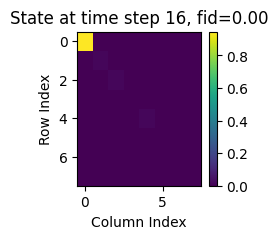

<Figure size 640x480 with 0 Axes>

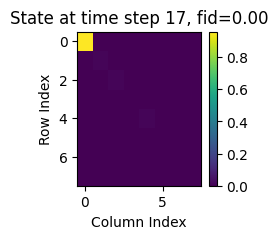

 57%|█████▋    | 17/30 [00:00<00:00, 23.70it/s]

<Figure size 640x480 with 0 Axes>

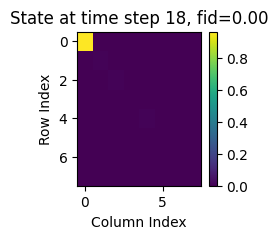

<Figure size 640x480 with 0 Axes>

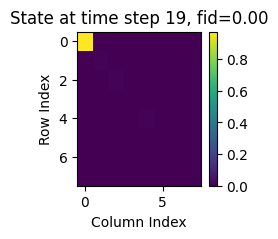

<Figure size 640x480 with 0 Axes>

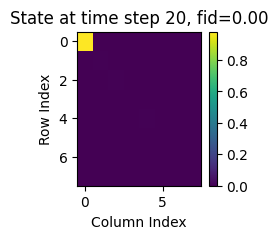

 67%|██████▋   | 20/30 [00:00<00:00, 23.66it/s]

<Figure size 640x480 with 0 Axes>

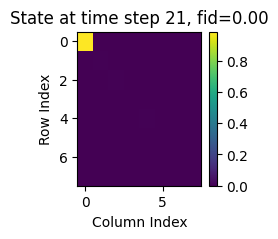

<Figure size 640x480 with 0 Axes>

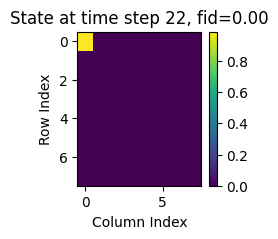

<Figure size 640x480 with 0 Axes>

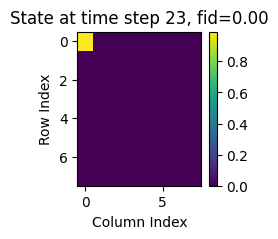

 77%|███████▋  | 23/30 [00:00<00:00, 23.23it/s]

<Figure size 640x480 with 0 Axes>

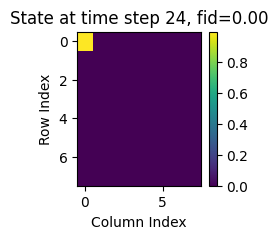

<Figure size 640x480 with 0 Axes>

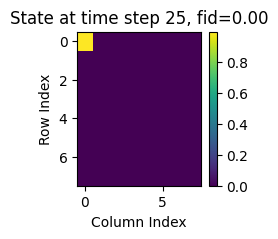

<Figure size 640x480 with 0 Axes>

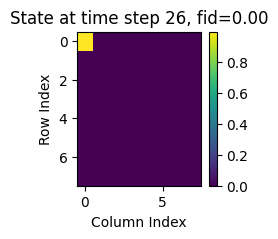

 87%|████████▋ | 26/30 [00:01<00:00, 20.66it/s]

<Figure size 640x480 with 0 Axes>

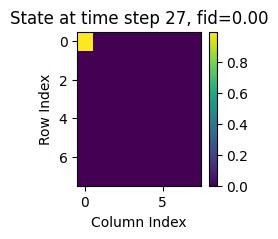

<Figure size 640x480 with 0 Axes>

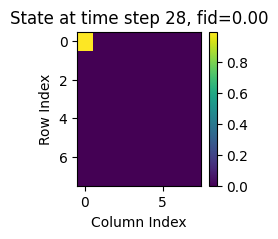

<Figure size 640x480 with 0 Axes>

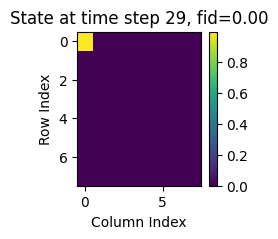

 97%|█████████▋| 29/30 [00:01<00:00, 21.32it/s]

<Figure size 640x480 with 0 Axes>

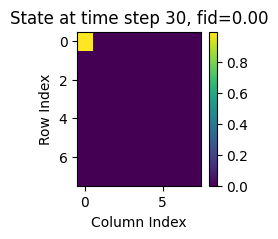

100%|██████████| 30/30 [00:01<00:00, 22.24it/s]


In [21]:
decay_superoperator = generate_decay_superoperator(N_chains, gamma)

def propagate_single_timestep(rho):
    tmp = decay_superoperator(rho)

    fid = fidelity(C_target=rho_initial, U_final=tmp, evo_type="density")

    return tmp, fid

plot_matrix(jnp.abs(rho_initial), title="Initial state", figsize=(2,2))
rho = rho_initial
for i in tqdm(range(evaluation_time_steps)):
    rho, fid = propagate_single_timestep(rho)

    plot_matrix(jnp.abs(rho), title=f"State at time step {i+1}, fid={fid:.2f}", figsize=(2,2))

    assert np.all(np.isclose(rho, rho.conj().T)), "State is not Hermitian"
    assert np.isclose(np.trace(rho).real, 1.0), "State is not normalized"
    assert np.all(np.linalg.eigvalsh(rho) >= -1e-10), "State is not positive semidefinite"